In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("Downloads/kidney_disease.csv")


In [2]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df['classification']=df['classification'].map({'ckd':1,"notckd":0})
df['rbc']=df['rbc'].map({'normal':1, 'abnormal':0})
df['pc']=df['pc'].map({'normal':1, 'abnormal':0})
df['pcc']=df['pcc'].map({'present':1, 'notpresent':0})
df['ba']=df['ba'].map({'present':1, 'notpresent':0})
df['htn']=df['htn'].map({'yes':1,'no':0})
df['dm']=df['dm'].map({'yes':1,'no':0})
df['cad']=df['cad'].map({'yes':1,'no':0})
df['pe']=df['pe'].map({'yes':1,'no':0})
df['ane']=df['ane'].map({'yes':1,'no':0})
df['appet']=df['appet'].map({'good':1,'poor':0})

df=df.dropna()
df['classification']=df['classification'].astype(int)

X=df.drop('classification',axis=1).values
y=df['classification'].values

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.svm import SVC
model=SVC(kernel="linear", C=0.01)
model.fit(X_train,y_train)

SVC(C=0.01, kernel='linear')

In [8]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 1.0
[[23  0]
 [ 0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         9

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



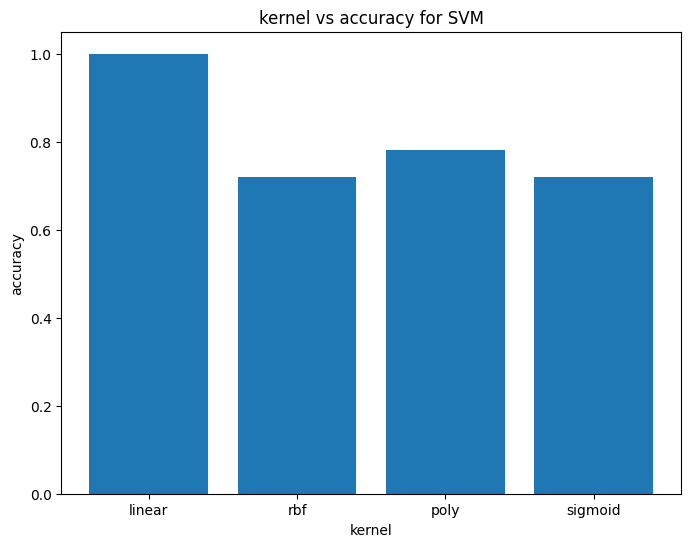

In [10]:
import matplotlib.pyplot as plt
kernels=['linear', 'rbf','poly','sigmoid']
accuracies=[]
for kernel in kernels:
    model=SVC(kernel=kernel, C=0.01)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(8,6))
plt.bar(kernels,accuracies)
plt.xlabel('kernel')
plt.ylabel('accuracy')
plt.title("kernel vs accuracy for SVM")
plt.show()

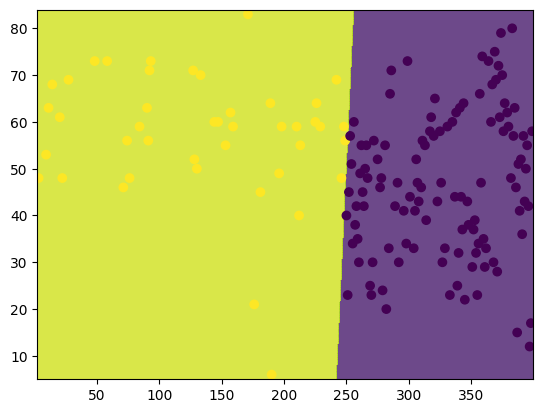

In [14]:
model=SVC(kernel='linear')
model.fit(X_train[:,:2],y_train)
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),
                 np.arange(y_min,y_max,0.02))
meshgrid_data=np.array([xx.ravel(),yy.ravel()]).T
z=model.predict(meshgrid_data)
z=z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha=.8)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()